### Import all Important libaries

In [7]:
#data Manipulation
import pandas as pd

#Mathematical operation
import numpy as np

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Algorithm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [8]:
#Load the dataset
df = pd.read_csv(r"D:\Datasets\CAR DETAILS FROM CAR DEKHO.csv")

In [9]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**This dataset consist 4340 Rows and 8 columns**

In [11]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**No null values in the dataset**

In [12]:
df.duplicated().sum()

763

 **There are 763 Duplicates in the dataset**

In [13]:
df[df.duplicated]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [14]:
# Drop the duplicates
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(3577, 8)

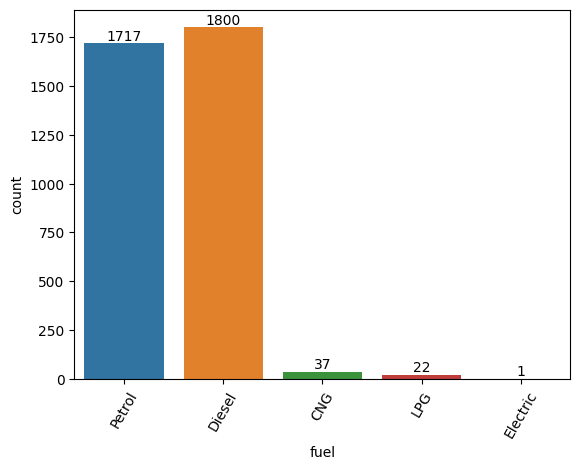

In [16]:
ax= sns.countplot(x='fuel',data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.show()

    

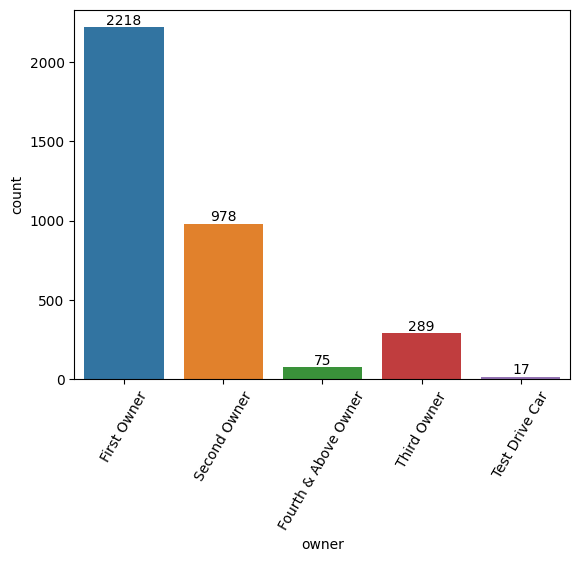

In [17]:
ax= sns.countplot(x='owner',data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.show()


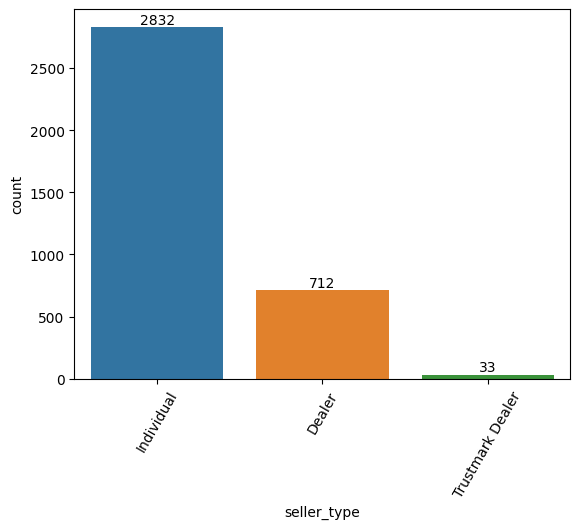

In [18]:
ax= sns.countplot(x='seller_type',data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.show()

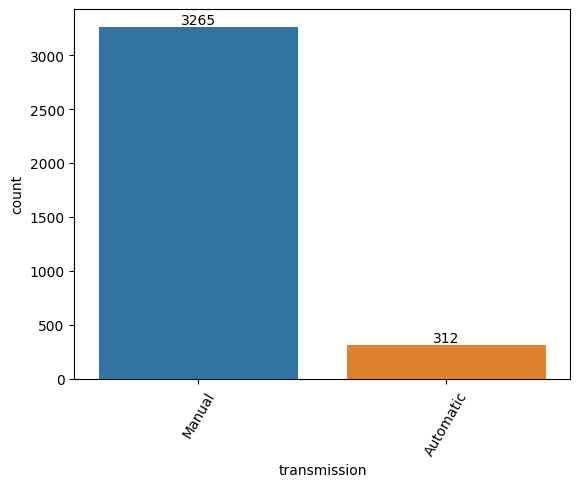

In [19]:
ax= sns.countplot(x='transmission',data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.show()

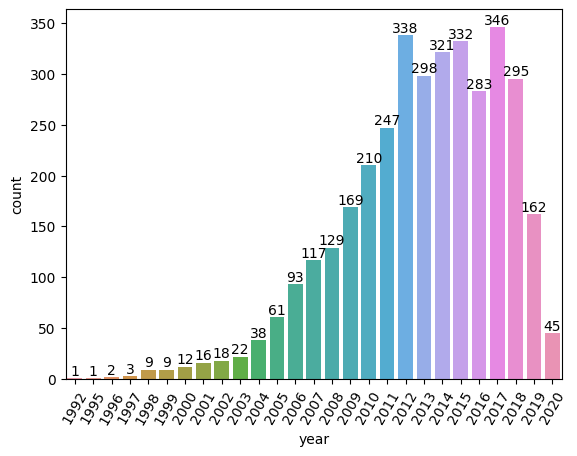

In [20]:
ax= sns.countplot(x='year',data = df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.show()

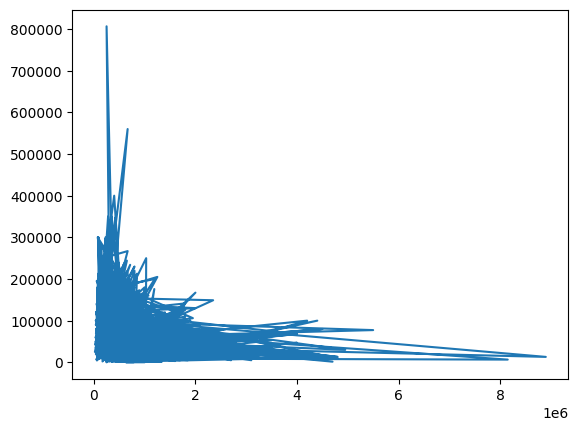

In [21]:
plt.plot(df['selling_price'],df['km_driven'])

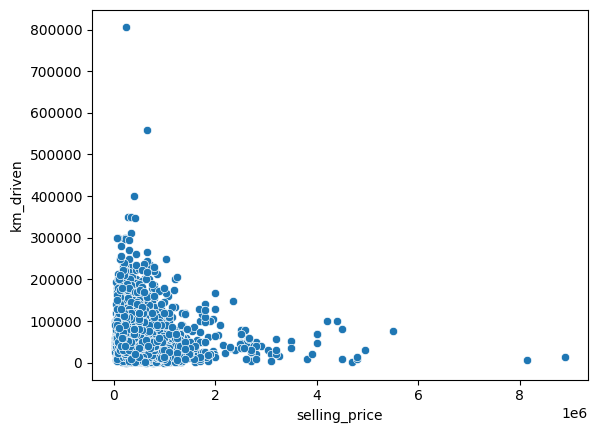

In [22]:
sns.scatterplot(y = 'km_driven', x = 'selling_price',data = df)
plt.show()

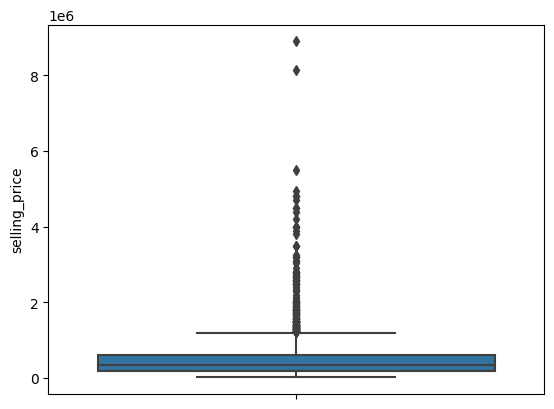

In [23]:
sns.boxplot(y='selling_price',data=df)
plt.show()

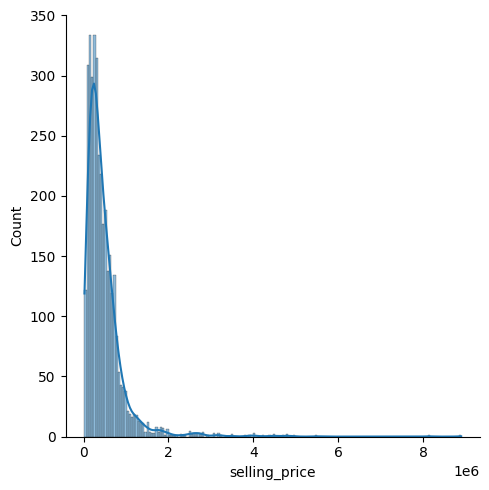

In [24]:
sns.displot(x='selling_price',data=df,kind='hist',kde= True)
plt.show()

In [25]:
df[df['selling_price']>4000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
963,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
3453,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
3875,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,100000,Diesel,Dealer,Automatic,First Owner
3883,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner


In [26]:
x=df[df['selling_price']>4000000].index.to_list()
x

[89, 101, 539, 555, 963, 3453, 3872, 3875, 3883, 3969, 4047]

In [27]:
df.drop(index =x,inplace = True)

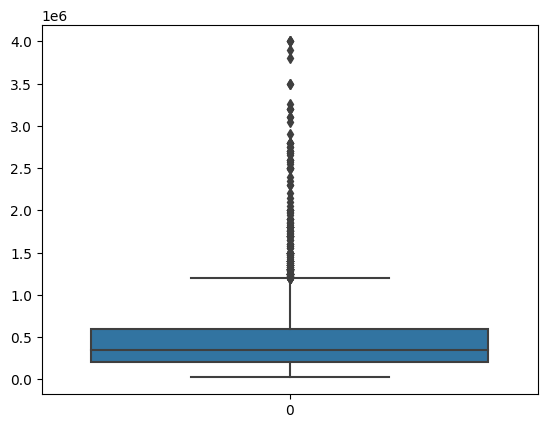

In [28]:
sns.boxplot(df['selling_price'])
plt.show()

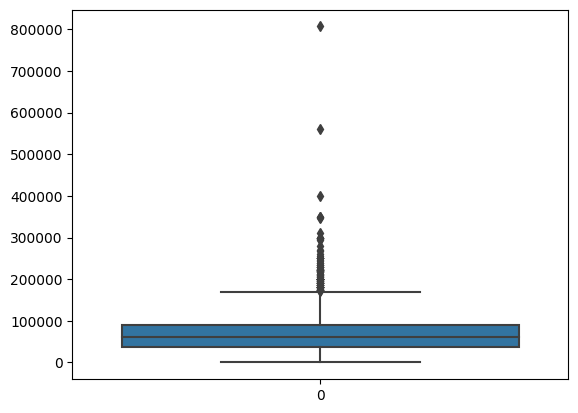

In [29]:
sns.boxplot(df['km_driven'])
plt.show()

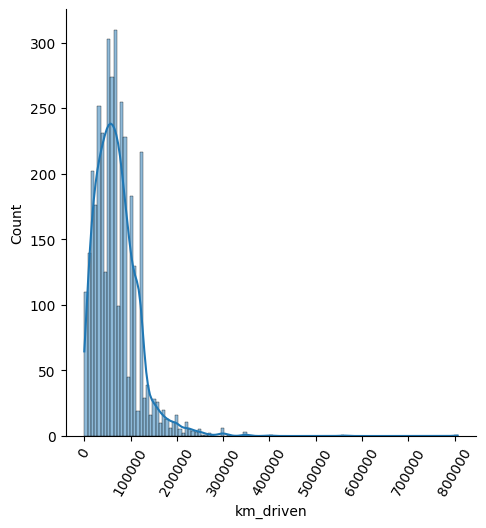

In [30]:
sns.displot(df['km_driven'],kde=True)
plt.xticks(rotation = 60)
plt.show()

In [31]:
z = df[df['km_driven']>200000].index.to_list()
df[df['km_driven']>200000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
225,Mahindra Renault Logan 1.5 DLS,2008,89999,213000,Diesel,Individual,Manual,First Owner
324,Mahindra XUV500 W8 2WD,2012,850000,212814,Diesel,Dealer,Manual,First Owner
394,Mahindra Scorpio REV 116,2006,220000,220000,Petrol,Individual,Manual,Second Owner
502,Maruti Swift Ldi BSIII,2009,300000,217871,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
656,Tata Safari Storme VX,2013,360000,206500,Diesel,Individual,Manual,First Owner
821,Hyundai EON Magna Plus,2013,125000,205000,Petrol,Individual,Manual,First Owner


In [32]:
df.drop(index = z,inplace = True)

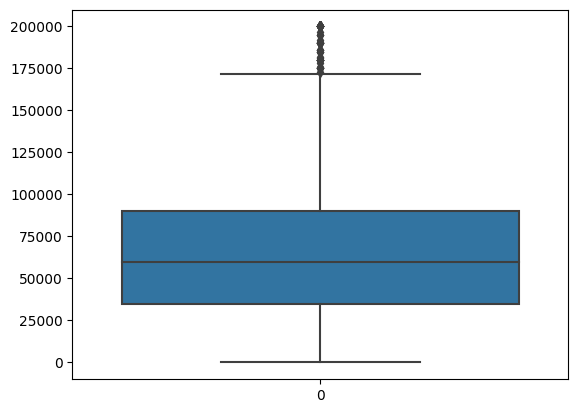

In [33]:
sns.boxplot(df['km_driven'])
plt.show()

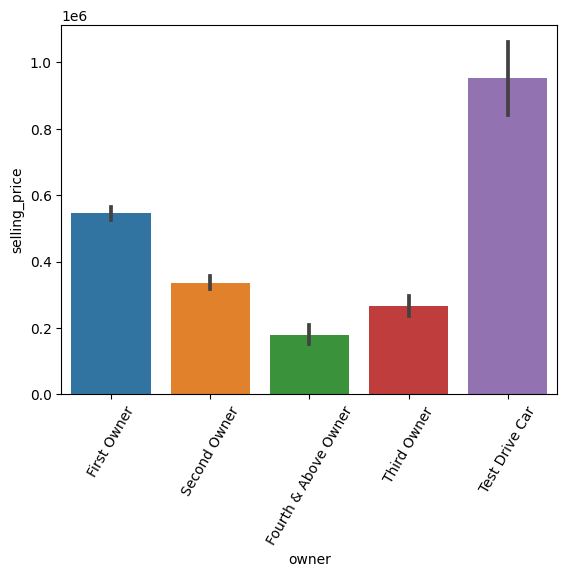

In [34]:
sns.barplot(x='owner',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.show()

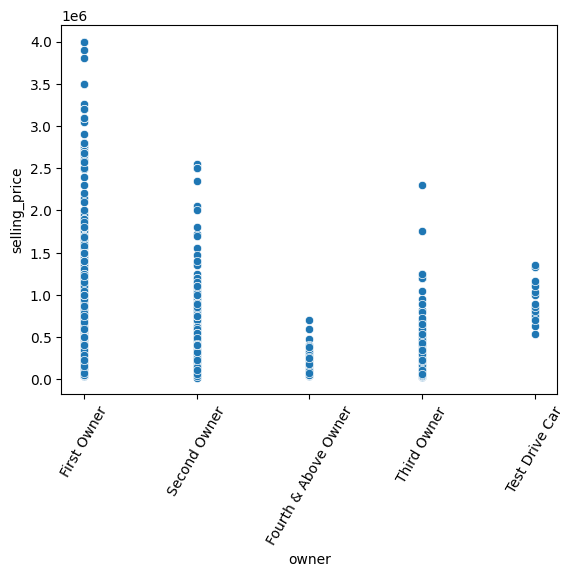

In [35]:
sns.scatterplot(x='owner',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.show()

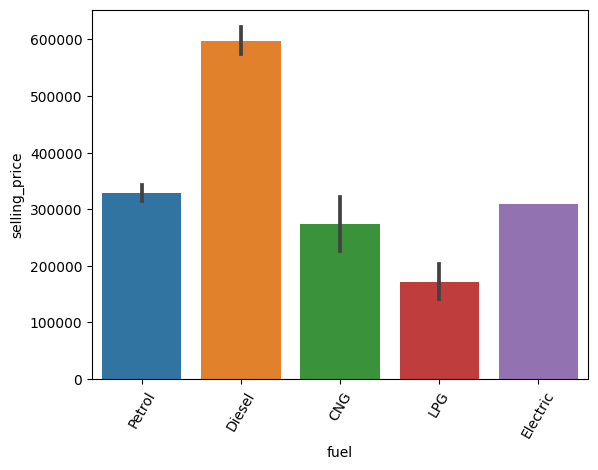

In [36]:
sns.barplot(x='fuel',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.show()

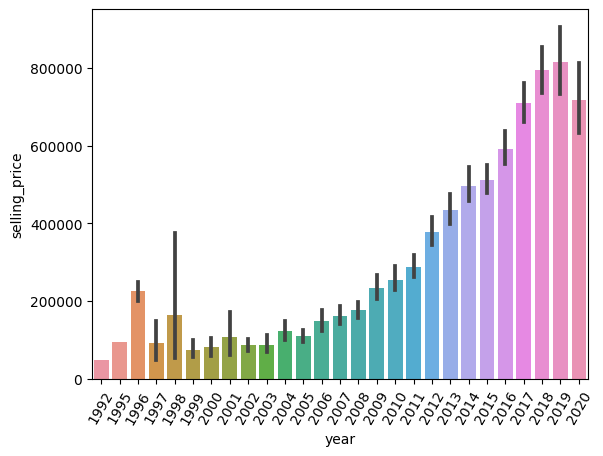

In [37]:
sns.barplot(x='year',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.show()

## Machine Learning


In [38]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [39]:
le = LabelEncoder()
df['owner']=le.fit_transform(df['owner'])
df['fuel']=le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission'])

In [40]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


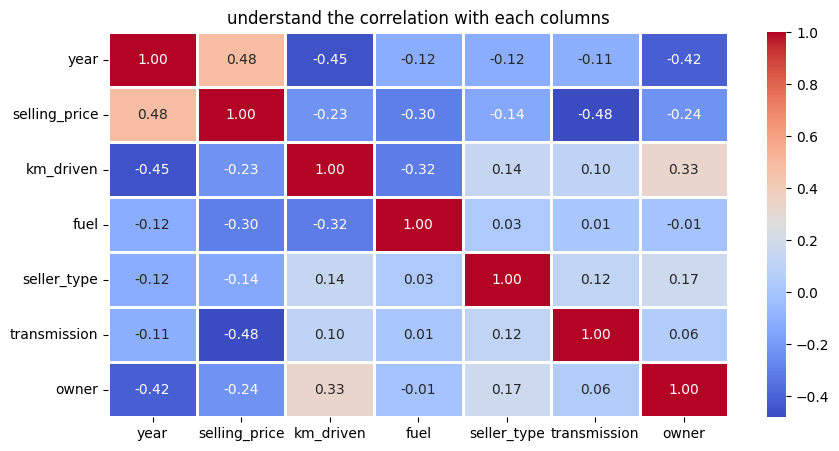

In [41]:
# visualize the coorelation map
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm',fmt='.2f',annot_kws = None,linewidths=1)
plt.title('understand the correlation with each columns')
plt.show()

# 
**From above heatmap we see that the year and transmission is highly correlated with our target variable selling_price apart from this fuel, km_driven and owner is also correlated with target feature**

In [42]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [43]:
x=df[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]
y =df[['selling_price']]

#### **In above cell i created two dataframe x and y where x contain highly correlated features and y contain target variable**

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =1)

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [46]:
reg = linear_model.LinearRegression()
# fit the model
reg.fit(x_train,y_train)

LinearRegression()

In [47]:
regp = reg.predict(x_test)
# regp.ndim

## in above cell we predict the value of selling price using trained model

In [48]:
# Reshaping the predicts array
regp
regp = np.array(regp).reshape(-1)
# regp.ndim
regp

array([534743.52827165, 376973.41406271, 619733.89582548, ...,
       195898.32373646,  40391.99956553, 388940.69563724])

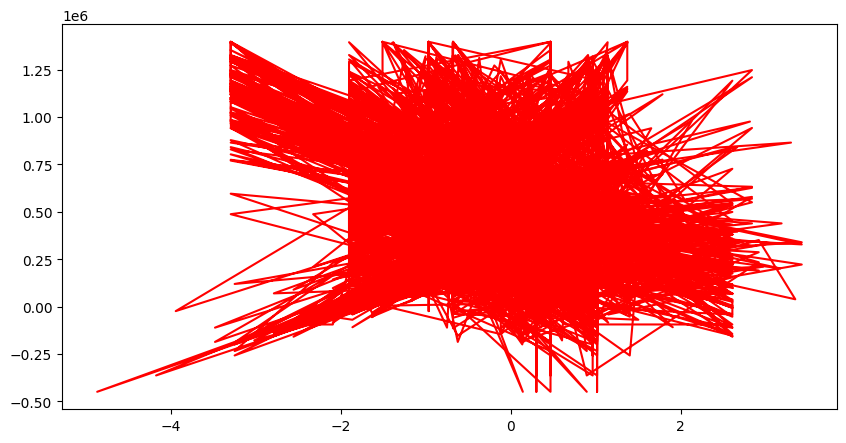

In [49]:
plt.figure(figsize=(10,5))
plt.plot(x_test,regp,color='red')
plt.show()

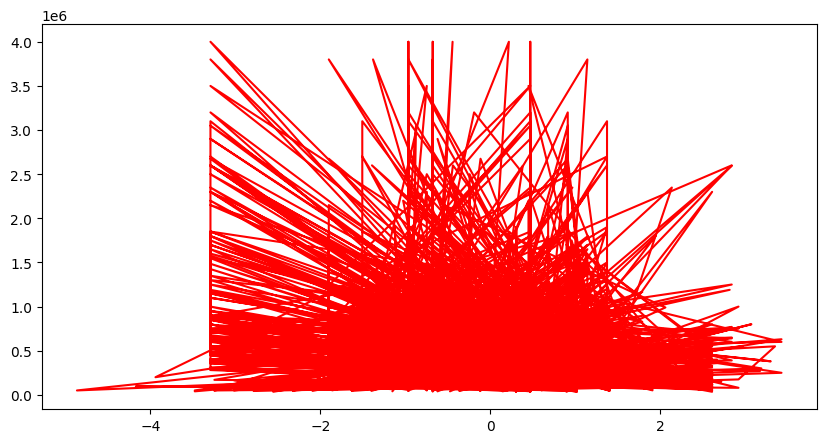

In [50]:
plt.figure(figsize=(10,5))
plt.plot(x_test, y_test ,color='red')
plt.show()

In [51]:
x_test = pd.DataFrame(x_test)
x_test.columns=['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']
x_test

,year,km_driven,fuel,seller_type,transmission,owner
0,1.373269,-1.379935,1.017748,0.470067,0.303691,-0.677585
1,-0.243708,1.908398,-0.963852,0.470067,0.303691,0.966085
2,0.680279,-0.115192,-0.963852,0.470067,0.303691,-0.677585
3,-0.936698,2.920193,-0.963852,0.470067,0.303691,0.966085
4,-4.170653,0.896603,1.017748,0.470067,0.303691,0.966085
...,...,...,...,...,...,...
1049,-0.474705,0.390706,-0.963852,0.470067,0.303691,-0.677585
1050,-1.167695,2.009578,-0.963852,0.470067,0.303691,2.609754
1051,-0.474705,-0.064602,1.017748,0.470067,0.303691,0.966085
1052,-1.398692,0.517180,1.017748,0.470067,0.303691,0.966085


In [52]:
new = pd.concat([x_test['km_driven'].reset_index(drop = True),pd.Series(regp)],axis=1)
new.sort_values(by ='km_driven',inplace = True)
new

,km_driven,0
180,-1.630329,822591.017450
907,-1.607589,577406.779992
729,-1.607589,752830.706272
983,-1.607564,402325.855549
813,-1.607336,581753.814975
...,...,...
702,3.299616,865066.966263
42,3.350206,38605.849446
781,3.426091,339242.734479
271,3.426091,221869.694618


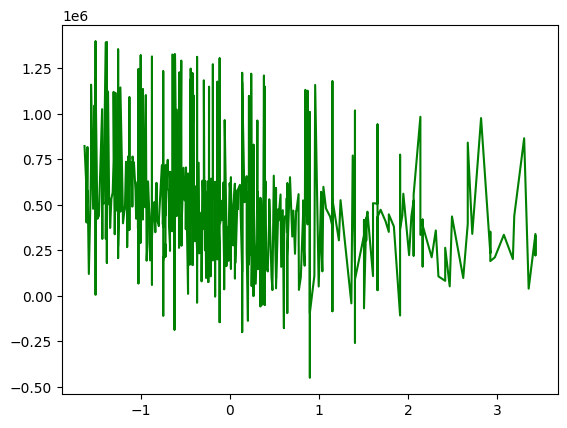

In [53]:
plt.plot(new['km_driven'],new[0],color ='green')
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(y_test,regp))
print("RMSE: ",rmse)

RMSE:  318451.7462824695
